# Impact of Russian tweets in the US Presidential elections 2016

TO DO List

    - Finding the missing values    
    - Understanding the trend of data
    - Preparing data for analysis 
    - Analysing whether tweets impacts the US elections or not
    - Analysing the percent change in tweet counts
    - Removing re-tweets mentioned in the data
    - Removing the hyper-links from the data
    - Removing the hashtags from the data 
    - Removing the user- mentions from the data 
    - Extracting user-mentions from the data 
    - Extracting hashtags from the data 

## Importing the libraries and data 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\lovep\Downloads\Lessons\Projects/tweets.csv")

In [3]:
df.head()

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN
2,1.710805e+09,cookncooks,1.487767e+12,2017-02-22 12:43:43,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,8.343832e+17,NaN,[],[],POSTED,[],NaN,NaN
3,2.584153e+09,queenofthewo,1.482765e+12,2016-12-26 15:06:41,NaN,NaN,NaN,RT @jww372: I don't have to guess your religio...,8.134006e+17,NaN,"[""ChristmasAftermath""]",[],POSTED,[],NaN,NaN
4,1.768260e+09,mrclydepratt,1.501987e+12,2017-08-06 02:36:24,NaN,NaN,NaN,RT @Shareblue: Pence and his lawyers decided w...,8.940243e+17,NaN,[],[],POSTED,[],NaN,NaN


In [4]:
df.shape

(203482, 16)

## Finding the missing values 

In [5]:
df.isnull().sum().sort_values(ascending = False)

in_reply_to_status_id    202923
retweeted_status_id      163831
retweet_count            145399
retweeted                145399
favorite_count           145399
source                   145398
user_id                    8065
tweet_id                   2314
created_at                   21
created_str                  21
text                         21
user_key                      0
hashtags                      0
expanded_urls                 0
posted                        0
mentions                      0
dtype: int64

In [6]:
df.dtypes

user_id                  float64
user_key                  object
created_at               float64
created_str               object
retweet_count            float64
retweeted                 object
favorite_count           float64
text                      object
tweet_id                 float64
source                    object
hashtags                  object
expanded_urls             object
posted                    object
mentions                  object
retweeted_status_id      float64
in_reply_to_status_id    float64
dtype: object

## Exploratory Analysis and Visualization

In [7]:
# Converting created_str column's data type into DateTime

df["created_str"] = pd.to_datetime(df["created_str"])

In [8]:
df["created_str"].dtypes

dtype('<M8[ns]')

In [9]:
# Minimum time
df["created_str"].min()

Timestamp('2014-07-14 18:04:55')

In [10]:
# Maximum time

df["created_str"].max()

Timestamp('2017-09-26 09:05:32')

### Tweets trend by date

In [11]:
df["created_str_date"] = df["created_str"].dt.date

In [12]:
df["created_str_date"]

0         2016-03-22
1         2016-10-10
2         2017-02-22
3         2016-12-26
4         2017-08-06
             ...    
203477    2016-11-01
203478    2015-06-18
203479    2017-01-10
203480    2016-11-20
203481    2016-12-19
Name: created_str_date, Length: 203482, dtype: object

In [13]:
tweet_trend = pd.value_counts(df["created_str_date"]).to_frame()

In [14]:
tweet_trend.columns = ["tweets_count"]

In [15]:
tweet_trend.sort_index(ascending = True, inplace = True)

In [16]:
tweet_trend

,tweets_count
2014-07-14,1
2014-07-17,1
2014-07-20,2
2014-07-22,3
2014-07-23,1
...,...
2017-09-10,7
2017-09-16,6
2017-09-19,1
2017-09-24,1


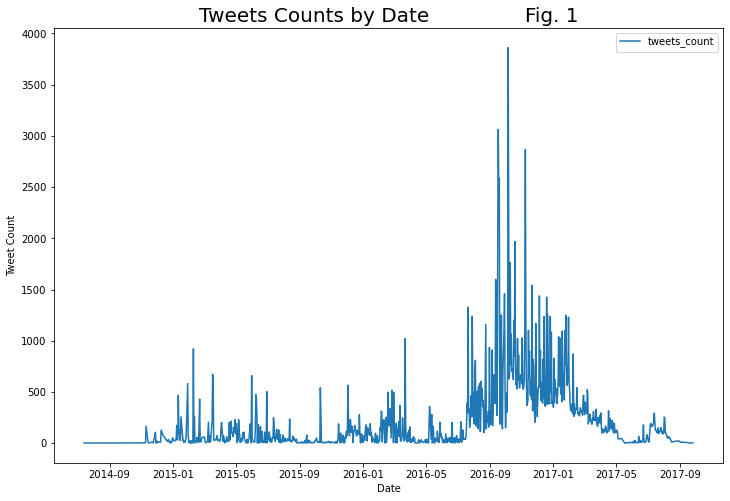

In [17]:
tweet_trend.plot(figsize = (12, 8))
plt.title("Tweets Counts by Date               Fig. 1", size = 20)
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.show()

### Important dates 

In [18]:
# These are the important dates or timelines in which the major events happened during the election period. 

dates_list = ['2015-06-16', '2015-12-07', '2016-02-01', 
             '2016-03-01', '2016-03-03', '2016-03-11', 
             '2016-05-03', '2016-05-26', '2016-06-20', 
             '2016-07-15', '2016-07-21', '2016-08-17', 
             '2016-09-01', '2016-10-07', '2016-11-08']

important_dates = pd.Series(dates_list)
important_dates

0     2015-06-16
1     2015-12-07
2     2016-02-01
3     2016-03-01
4     2016-03-03
5     2016-03-11
6     2016-05-03
7     2016-05-26
8     2016-06-20
9     2016-07-15
10    2016-07-21
11    2016-08-17
12    2016-09-01
13    2016-10-07
14    2016-11-08
dtype: object

In [19]:
# Copying the tweet_trend data 

data = tweet_trend.copy()

In [20]:
data

,tweets_count
2014-07-14,1
2014-07-17,1
2014-07-20,2
2014-07-22,3
2014-07-23,1
...,...
2017-09-10,7
2017-09-16,6
2017-09-19,1
2017-09-24,1


In [21]:
data["Important Events"] = False

In [22]:
data

,tweets_count,Important Events
2014-07-14,1,False
2014-07-17,1,False
2014-07-20,2,False
2014-07-22,3,False
2014-07-23,1,False
...,...,...
2017-09-10,7,False
2017-09-16,6,False
2017-09-19,1,False
2017-09-24,1,False


In [23]:
data = data.reset_index().rename(columns = {"index" : "date"})

In [24]:
data

,date,tweets_count,Important Events
0,2014-07-14,1,False
1,2014-07-17,1,False
2,2014-07-20,2,False
3,2014-07-22,3,False
4,2014-07-23,1,False
...,...,...,...
925,2017-09-10,7,False
926,2017-09-16,6,False
927,2017-09-19,1,False
928,2017-09-24,1,False


In [25]:
# We need to check if there is any date lies in important dates.

data["date"].isin(important_dates)

0      False
1      False
2      False
3      False
4      False
       ...  
925    False
926    False
927    False
928    False
929    False
Name: date, Length: 930, dtype: bool

In [26]:
# We are getting only false which means there is no such date lies in important dates 
# or data types are different of date column and the important dates. 

In [27]:
type(important_dates[0])

str

In [28]:
type(data["date"][0])

datetime.date

In [29]:
# Changing the data types of date column of from the data.

data["date"] = data["date"].apply(lambda x:x.strftime("%Y-%m-%d"))

In [30]:
type(data["date"][0])

str

In [31]:
# Checking how many values of important dates lies in date column.

data["date"].isin(important_dates).value_counts()

False    915
True      15
Name: date, dtype: int64

In [32]:
# These are the values of Important Events columns which needs to be true

data[data["date"].isin(important_dates)]

,date,tweets_count,Important Events
170,2015-06-16,3,False
331,2015-12-07,219,False
382,2016-02-01,18,False
409,2016-03-01,143,False
411,2016-03-03,6,False
419,2016-03-11,64,False
467,2016-05-03,38,False
487,2016-05-26,6,False
511,2016-06-20,201,False
536,2016-07-15,47,False


In [33]:
# Converting them into true

data["Important Events"] = np.where(data["date"].isin(important_dates), True, False)

In [34]:
data[data["Important Events"] == True]

,date,tweets_count,Important Events
170,2015-06-16,3,True
331,2015-12-07,219,True
382,2016-02-01,18,True
409,2016-03-01,143,True
411,2016-03-03,6,True
419,2016-03-11,64,True
467,2016-05-03,38,True
487,2016-05-26,6,True
511,2016-06-20,201,True
536,2016-07-15,47,True


In [35]:
# Giving values to True and False. True as 1 and False as 0. 

data["values"] = np.where(data["date"].isin(important_dates), 1, 0)

In [36]:
data.head()

,date,tweets_count,Important Events,values
0,2014-07-14,1,False,0
1,2014-07-17,1,False,0
2,2014-07-20,2,False,0
3,2014-07-22,3,False,0
4,2014-07-23,1,False,0


In [37]:
filt = data["Important Events"] == True

In [38]:
filt

0      False
1      False
2      False
3      False
4      False
       ...  
925    False
926    False
927    False
928    False
929    False
Name: Important Events, Length: 930, dtype: bool

In [39]:
data[filt]

,date,tweets_count,Important Events,values
170,2015-06-16,3,True,1
331,2015-12-07,219,True,1
382,2016-02-01,18,True,1
409,2016-03-01,143,True,1
411,2016-03-03,6,True,1
419,2016-03-11,64,True,1
467,2016-05-03,38,True,1
487,2016-05-26,6,True,1
511,2016-06-20,201,True,1
536,2016-07-15,47,True,1


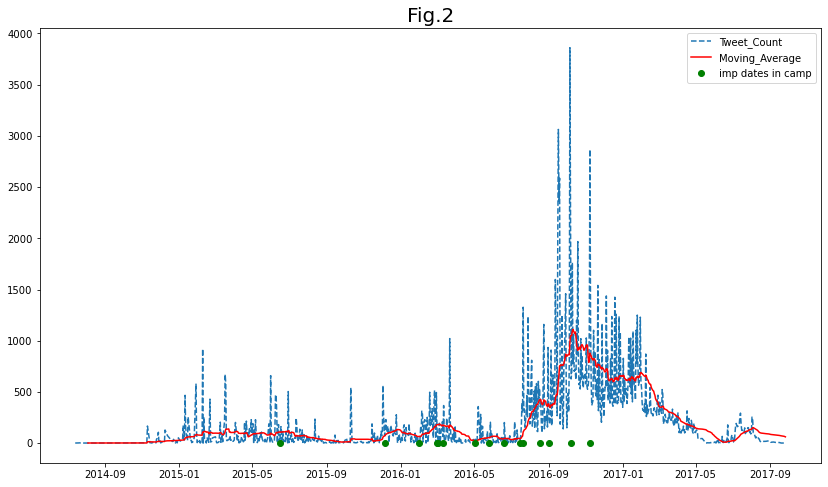

In [40]:
plt.figure(figsize = (14, 8))
plt.plot(tweet_trend, linestyle = "dashed", label = "Tweet_Count")

plt.plot(tweet_trend.rolling(window = 30, min_periods = 10).mean(), color = "Red", label = "Moving_Average")

plt.plot(pd.to_datetime(data[filt]["date"]), data[filt]["values"], marker = "o", color = "Green", linestyle = "none", label = "imp dates in camp")
plt.title("Fig.2", size = 20)
plt.legend()
plt.show()

In [41]:
# Percentage change in tweet counts between subsequent dates and then see if an important date relates with a spike or not. 

data["pct_change"] = data["tweets_count"].pct_change()*100

In [42]:
data.head()

,date,tweets_count,Important Events,values,pct_change
0,2014-07-14,1,False,0,NaN
1,2014-07-17,1,False,0,0.000000
2,2014-07-20,2,False,0,100.000000
3,2014-07-22,3,False,0,50.000000
4,2014-07-23,1,False,0,-66.666667


In [43]:
data.dtypes

date                 object
tweets_count          int64
Important Events       bool
values                int32
pct_change          float64
dtype: object

In [44]:
data["date"] = pd.to_datetime(data["date"])

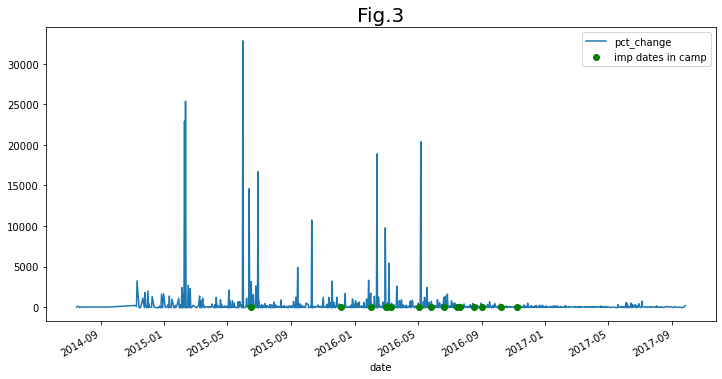

In [45]:
plt.figure(figsize = (12, 6))
data.set_index("date")["pct_change"].plot()

plt.plot(pd.to_datetime(data[filt]["date"].values), data[filt]["values"].values, marker = "o", color = "Green", linestyle = "none", label = "imp dates in camp")
plt.title("Fig.3", size = 20)

plt.legend()

# At the time of US elctions, we have seen certain types of tweet spikes. 

## Cleaning the Text column

In [46]:
df.head(3)

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,created_str_date
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN,2016-03-22
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN,2016-10-10
2,1.710805e+09,cookncooks,1.487767e+12,2017-02-22 12:43:43,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,8.343832e+17,NaN,[],[],POSTED,[],NaN,NaN,2017-02-22


In [47]:
df.text

0         #IslamKills Are you trying to say that there w...
1         Clinton: Trump should’ve apologized more, atta...
2         RT @ltapoll: Who was/is the best president of ...
3         RT @jww372: I don't have to guess your religio...
4         RT @Shareblue: Pence and his lawyers decided w...
                                ...                        
203477    RT @AndreaChalupa: In intel circles, the story...
203478    RT @KansasCityDNews: Tonganoxie police: Middle...
203479    RT @signsinyork: Getting the right #company lo...
203480    The Latest: Obama affirms continuity of ties w...
203481    RT @futureguru100: U cant just Upload a CD onl...
Name: text, Length: 203482, dtype: object

In [48]:
df.text[0]

'#IslamKills Are you trying to say that there were no terrorist attacks in Europe before refugees were let in?'

In [49]:
# Missing values in text column

df.text.isnull().sum()

21

In [50]:
# Dropping the missing values

df.dropna(subset = ["text"], inplace = True)

In [51]:
df.text.isnull().sum()

0

In [52]:
df["text"][10]

"RT @ElPenguinito: #myfarewellwordswouldbe I've buried my fortune in the park under a giant..."

### Remove re-tweet mentions from data (RT with the text means re-tweet (RT))

In [53]:
df["text"].str.contains("RT")

0         False
1         False
2          True
3          True
4          True
          ...  
203477     True
203478     True
203479     True
203480    False
203481     True
Name: text, Length: 203461, dtype: bool

In [54]:
df["text"][2]

'RT @ltapoll: Who was/is the best president of the past 25 years? (Vote &amp; Retweet)'

In [55]:
# I will be using regular expression (re) to replace RT of re-tweets with blank space.

In [56]:
import re

In [57]:
re.sub("RT.*?", "", df["text"][2])

' @ltapoll: Who was/is the best president of the past 25 years? (Vote &amp; Retweet)'

In [58]:
# we need to exclude some unnecessary things attached with the string

text = re.sub("RT.*?:", "", df["text"][4])

In [59]:
text

' Pence and his lawyers decided which of his official emails the public could see\r\n\r\nhttps://t.co/HjhPguBK1Y by @alisonrose711'

In [60]:
obj = re.match(".*", text)

In [61]:
obj

<re.Match object; span=(0, 81), match=' Pence and his lawyers decided which of his offic>

In [62]:
obj.group()

' Pence and his lawyers decided which of his official emails the public could see\r'

In [63]:
obj.group().strip()

'Pence and his lawyers decided which of his official emails the public could see'

In [64]:
# Creating the function to replacing RT of the whole text column. 

def remove_retweet(tweet):
    text = re.sub("RT.*?:", "", tweet)
    obj = re.match(".*", text)
    return obj.group().strip()

In [65]:
remove_retweet(df["text"][4])

'Pence and his lawyers decided which of his official emails the public could see'

In [66]:
text_only = df["text"].apply(remove_retweet)

In [67]:
text_only

0         #IslamKills Are you trying to say that there w...
1         Clinton: Trump should’ve apologized more, atta...
2         Who was/is the best president of the past 25 y...
3         I don't have to guess your religion! #Christma...
4         Pence and his lawyers decided which of his off...
                                ...                        
203477    In intel circles, the story goes FSB filmed Tr...
203478    Tonganoxie police: Middle school girl sexually...
203479    Getting the right #company logo: How #business...
203480    The Latest: Obama affirms continuity of ties w...
203481    U cant just Upload a CD online &amp; thats it....
Name: text, Length: 203461, dtype: object

### Removing the hyperkinks 

In [68]:
text_only.str.contains("http")

0         False
1          True
2         False
3         False
4         False
          ...  
203477    False
203478    False
203479     True
203480     True
203481    False
Name: text, Length: 203461, dtype: bool

In [69]:
text_only[text_only.str.contains("http")]

1         Clinton: Trump should’ve apologized more, atta...
6         You’ll never guess who tweeted something false...
7         New post: WATCH: DIAMOND AND SILK Rip On John ...
8         3 Women Face Charges After Being Caught Steali...
13        Dave Chappelle: "Black Lives Matter" is the wo...
                                ...                        
203473    Theresa A. Dear's "Let's Get to Work" @WVON169...
203474    This 22-year-old got out of an awkward convo w...
203475    #tcot #news #variety New Facebook tool allows ...
203479    Getting the right #company logo: How #business...
203480    The Latest: Obama affirms continuity of ties w...
Name: text, Length: 95394, dtype: object

In [70]:
text_only[1]

'Clinton: Trump should’ve apologized more, attacked less https://t.co/eJampkoHFZ'

In [71]:
re.sub("http.?:.*", "", text_only[1])

'Clinton: Trump should’ve apologized more, attacked less '

In [72]:
def remove_links(tweet):
    return re.sub("http.?:.*", "", tweet)

In [73]:
text_no_links = text_only.apply(remove_links)

In [74]:
text_no_links

0         #IslamKills Are you trying to say that there w...
1         Clinton: Trump should’ve apologized more, atta...
2         Who was/is the best president of the past 25 y...
3         I don't have to guess your religion! #Christma...
4         Pence and his lawyers decided which of his off...
                                ...                        
203477    In intel circles, the story goes FSB filmed Tr...
203478    Tonganoxie police: Middle school girl sexually...
203479    Getting the right #company logo: How #business...
203480    The Latest: Obama affirms continuity of ties w...
203481    U cant just Upload a CD online &amp; thats it....
Name: text, Length: 203461, dtype: object

### Removing the hashtags

In [75]:
text_no_links.str.contains("#")

0          True
1         False
2         False
3          True
4         False
          ...  
203477    False
203478     True
203479     True
203480    False
203481    False
Name: text, Length: 203461, dtype: bool

In [76]:
text_no_links[10]

"#myfarewellwordswouldbe I've buried my fortune in the park under a giant..."

In [77]:
re.sub("#\S+", "", text_no_links[10])

" I've buried my fortune in the park under a giant..."

In [78]:
def remove_hashtags(tweet):
    return re.sub("#\S+", "", tweet)

In [79]:
text_no_hashtags = text_no_links.map(remove_hashtags)

In [80]:
text_no_hashtags

0          Are you trying to say that there were no terr...
1         Clinton: Trump should’ve apologized more, atta...
2         Who was/is the best president of the past 25 y...
3                     I don't have to guess your religion! 
4         Pence and his lawyers decided which of his off...
                                ...                        
203477    In intel circles, the story goes FSB filmed Tr...
203478    Tonganoxie police: Middle school girl sexually...
203479    Getting the right  logo: How  got their messag...
203480    The Latest: Obama affirms continuity of ties w...
203481    U cant just Upload a CD online &amp; thats it....
Name: text, Length: 203461, dtype: object

In [81]:
# Still there are some columns having hashtags but these are not actually hashtags, 
#these are just points which are highlighted with hashtags. 

text_no_hashtags[text_no_hashtags.str.contains("#")]

4190          Go    4 The Worlds Strongest     # AIRFORCE  
6763      # WHAT KINDA SHIT IS THIS ? WHERE IS HER MAMA ...
10073     Let's get  trending again to fund Michigan! Va...
15879                                         Lovin' this #
23075     I'd been quoting the 37,500 # stated in this S...
26044     # OBAMA HAS INVITED THESE RADICALS INTO THE US...
28124     Nebraska Democrats Planted Voter Registration ...
30234                            the # bacon is offended!! 
34087     GM Lied To The Public And To Trump About Where...
41239     @FoxNews @Austan_Goolsbee @POTUS The rates at ...
49105     "Someone explain how Putin knew to hack the po...
57469     Obama's biggest fault is he made it very clear...
60900     ▶@LanceScurv: Alternative Black News Episode #...
61607     Music speaks where words.... Don't speak so mu...
63469      I'm starting to take this # thing a little to...
65307      don't let people twist this, adding BLM to th...
67060     # WHILE THEY ARE TALKIN ABOUT 

In [82]:
text_no_hashtags[text_no_hashtags.str.contains("#")][6763]

'# WHAT KINDA SHIT IS THIS ? WHERE IS HER MAMA ? JOE BIDEN MUST BE CLOSE AROUND HE IS ALWAYS HORNY FOR  13 YR OLD GI…'

### Removing user mentions from the data

In [83]:
text_no_hashtags.str.contains("@")

0         False
1         False
2         False
3         False
4         False
          ...  
203477    False
203478    False
203479     True
203480    False
203481    False
Name: text, Length: 203461, dtype: bool

In [84]:
text_no_hashtags[203479]

'Getting the right  logo: How  got their message across @smallbusinessuk '

In [85]:
re.sub("@\S+", "", text_no_hashtags[203479])

'Getting the right  logo: How  got their message across  '

In [86]:
def remove_mentions(tweet):
    return re.sub("@\S+", "", tweet)

In [87]:
df["tweet_text_only"] = text_no_hashtags.map(remove_mentions)

In [88]:
df.head(3)

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,created_str_date,tweet_text_only
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN,2016-03-22,Are you trying to say that there were no terr...
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN,2016-10-10,"Clinton: Trump should’ve apologized more, atta..."
2,1.710805e+09,cookncooks,1.487767e+12,2017-02-22 12:43:43,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,8.343832e+17,NaN,[],[],POSTED,[],NaN,NaN,2017-02-22,Who was/is the best president of the past 25 y...


### Extracting the top user_mentions which are extremely used 

In [89]:
df["text"].str.contains("@")

0         False
1         False
2          True
3          True
4          True
          ...  
203477     True
203478     True
203479     True
203480    False
203481     True
Name: text, Length: 203461, dtype: bool

In [90]:
df["text"][2]

'RT @ltapoll: Who was/is the best president of the past 25 years? (Vote &amp; Retweet)'

In [91]:
re.findall("@\S+", df["text"][2])

['@ltapoll:']

In [92]:
def extract_user_mentions(tweet):
    user_mentions_only = []
    if len(re.findall("@\S+", tweet)) > 0:
        user_mentions_only.append(re.findall("@\S+", tweet))
    else:
        user_mentions_only.append(["0"])
    return user_mentions_only[0]

In [93]:
extract_user_mentions(df["text"][2])

['@ltapoll:']

In [94]:
df["user_mentions"] = df["text"].apply(extract_user_mentions)

In [95]:
df.head()

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,created_str_date,tweet_text_only,user_mentions
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN,2016-03-22,Are you trying to say that there were no terr...,[0]
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN,2016-10-10,"Clinton: Trump should’ve apologized more, atta...",[0]
2,1.710805e+09,cookncooks,1.487767e+12,2017-02-22 12:43:43,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,8.343832e+17,NaN,[],[],POSTED,[],NaN,NaN,2017-02-22,Who was/is the best president of the past 25 y...,[@ltapoll:]
3,2.584153e+09,queenofthewo,1.482765e+12,2016-12-26 15:06:41,NaN,NaN,NaN,RT @jww372: I don't have to guess your religio...,8.134006e+17,NaN,"[""ChristmasAftermath""]",[],POSTED,[],NaN,NaN,2016-12-26,I don't have to guess your religion!,[@jww372:]
4,1.768260e+09,mrclydepratt,1.501987e+12,2017-08-06 02:36:24,NaN,NaN,NaN,RT @Shareblue: Pence and his lawyers decided w...,8.940243e+17,NaN,[],[],POSTED,[],NaN,NaN,2017-08-06,Pence and his lawyers decided which of his off...,"[@Shareblue:, @alisonrose711]"


### Extracting the hashtags from the data which are extremely used 

In [96]:
df["text"].str.contains("#")

0          True
1         False
2         False
3          True
4         False
          ...  
203477    False
203478     True
203479     True
203480    False
203481    False
Name: text, Length: 203461, dtype: bool

In [97]:
df["text"][3]

"RT @jww372: I don't have to guess your religion! #ChristmasAftermath"

In [98]:
text = df["text"][3].split()

In [99]:
list(set([part for part in text if part.startswith("#")]))

['#ChristmasAftermath']

In [100]:
def extract_hashtags(text):
    return list(set([part for part in text.split() if part.startswith("#")]))

In [101]:
extract_hashtags(df["text"][3])

['#ChristmasAftermath']

In [102]:
df["tweet_hashtags"] = df["text"].apply(extract_hashtags)

In [103]:
df.head(3)

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,created_str_date,tweet_text_only,user_mentions,tweet_hashtags
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN,2016-03-22,Are you trying to say that there were no terr...,[0],[#IslamKills]
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN,2016-10-10,"Clinton: Trump should’ve apologized more, atta...",[0],[]
2,1.710805e+09,cookncooks,1.487767e+12,2017-02-22 12:43:43,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,8.343832e+17,NaN,[],[],POSTED,[],NaN,NaN,2017-02-22,Who was/is the best president of the past 25 y...,[@ltapoll:],[]


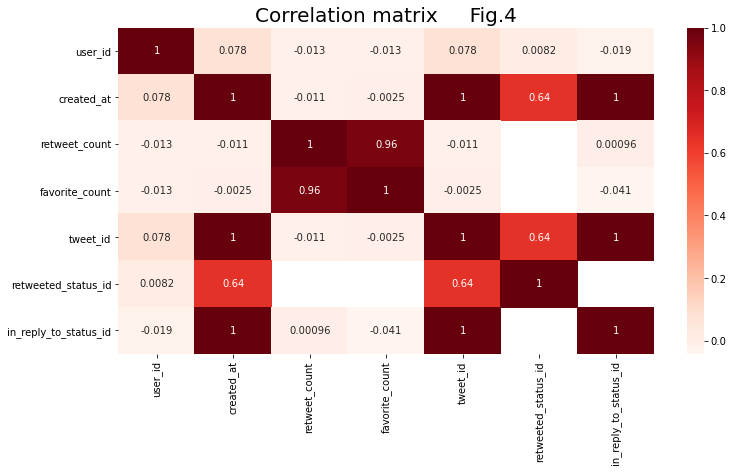

In [104]:
# Finding the correlation among all the numerical columns by using heatmap.  

plt.figure(figsize = (12, 6))
sns.heatmap(df.corr(), annot = True, cmap = "Reds")
plt.title("Correlation matrix     Fig.4", size = 20)
plt.show()

# Summary 

    - At the time of US elections, there is a tweet spikes as per fig 3. It means more tweets were tweeted in the election   days to manipulate the elections. 
    
    - There is a strong correlation between retweet count and favorite count, which means most of the rewteeted counts were liked.